In [14]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

air = ml.Non_Dispersion(1)
sodalime = ml.Non_Dispersion(1.65)
OC = ml.open_material('OC_LENS', 'Material')
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')
ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])

wl = np.linspace(400, 700, 301)

bri = lambda th:tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0]-th[3]-th[4]-th[5]-th[6], th[1], th[2], th[3], th[4], th[5], th[6], th[7], th[8], th[9], None]
).reflectance(wl)

dia = lambda th:tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[8], th[9], None]
).reflectance(wl)

tra = lambda th:tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[8], th[9], None]
).reflectance(wl)

delta_d_b = lambda th: np.mean(abs(bri(th)-dia(th)))
delta_d_t = lambda th: np.mean(abs(tra(th)-dia(th)))

fom = lambda th: delta_d_b(th)+delta_d_t(th)

In [6]:
sol = differential_evolution(
    fom, [
        (2000,2600),(4,80),(4,80),(20,40),(4,80),(4,80),(1000,1500),(70,200),(4,80),(4,80)
    ], disp=True, polish=False, popsize=20, mutation=0.3, recombination =0.9,strategy = 'best1exp'
)
print(sol.x)

[2024.72861482    4.81979168   45.50162573   20.           56.79184376
    6.85442722 1026.49019516  119.09945853   23.56725165   13.8295915 ]


bridge: 5.196143803814257
xy-ITO: 5.204858611799143
pattern: 5.2414951857291765
bridge: 0.2518371728768497
pattern: 0.24292849495374477


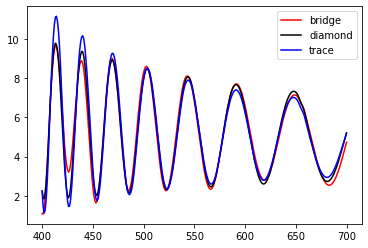

In [16]:
tk = sol.x

print('bridge:',100*np.mean(bri(tk)))
print('xy-ITO:',100*np.mean(dia(tk)))
print('pattern:',100*np.mean(tra(tk)))
print('bridge:',100*delta_d_b(tk))
print('pattern:',100*delta_d_t(tk))

plt.plot(wl, 100*bri(tk), 'r-', label = 'bridge')
plt.plot(wl, 100*dia(tk), 'k-', label = 'diamond')
plt.plot(wl, 100*tra(tk), 'b-', label = 'trace')
plt.legend(loc = 'best')
plt.savefig('LENS_partial_IM.png')
plt.show()